# **Project 1 - Charlotte's Neighborhood Crime Over Time**

##  **Introduction**
Crime is a concern for many urban areas in the United States, and Charlotte is no exception. It is important to understand crime patterns and statistics to help communities and law enforcement agencies develop plans, allocate resources, and engage with the community to improve public safety. The Charlotte-Mecklenburg Police Department (CMPD) regularly publishes detailed crime reports. As of July 22, 2024, overall crime in Charlotte has seen a slight increase of 1% compared to the previous year. This includes various types of crimes, categorized broadly into violent crimes and property crimes.

For this project, I plan to explore how crime has evolved over time in different communities and how does location (such as open field, department store, hotel/motel, etc.) of the incident  within neighborhoods effective crime? To answer this question, I will use the CMPD_PATROL_DIVISION and the PLACE_DETAIL-DESCRIPTION columns to examine these trends over time.  By determining communitites that are experiencing higher than normal levels of crime and specific location, the city, local law enforcement, and community can help allocated resources, develop plans and support community outreach to support all neighborhoods.

https://data.charlottenc.gov/datasets/charlotte::cmpd-incidents-1/about


##  **Dataset**
The dataset is available from the city of Charlotte's open data portal. Data is available in various formats including CSV and contains both criminal and non-criminal incident reports from 2017 through 2024. It contains 688,973 observations and 29 features.

These features are 'X', 'Y', 'YEAR', 'INCIDENT_REPORT_ID', 'LOCATION', 'CITY', 'STATE', 'ZIP', 'X_COORD_PUBLIC', 'Y_COORD_PUBLIC', 'LATITUDE_PUBLIC', 'LONGITUDE_PUBLIC', 'DIVISION_ID', 'CMPD_PATROL_DIVISION', 'NPA', 'DATE_REPORTED', 'DATE_INCIDENT_BEGAN', 'DATE_INCIDENT_END', 'ADDRESS_DESCRIPTION', 'LOCATION_TYPE_DESCRIPTION', 'PLACE_TYPE_DESCRIPTION', 'PLACE_DETAIL_DESCRIPTION', 'CLEARANCE_STATUS', 'CLEARANCE_DETAIL_STATUS', 'CLEARANCE_DATE', 'HIGHEST_NIBRS_CODE', 'HIGHEST_NIBRS_DESCRIPTION', 'OBJECTID', and 'GlobalID'.

The website does not contain detailed metadata to describe. So, an attempt was made to define features based on the dataset. Below are descriptions of the less obvious features:

*   'X', 'Y' are unknown decimal values.
*   'INCIDENT_REPORT_ID'is the case number associated with the incident.
*   'LOCATION' is the physical address of the incident.
*   'X_COORD_PUBLIC', 'Y_COORD_PUBLIC'are unknown integer values.
*   'CMPD_PATROL_DIVISION' is the name of the division. It corresponds to numeric 'DIVISION_ID'.
*   'ADDRESS_DESCRIPTION' is a higher-level description of where the incident took place. Field mainly contained 'Location of occurrence' or 'Location where officer took report'
*   'NPA' is the Neighborhood Profile Area ID, a unique number that is assigned to different neighborhoods in Charlotte. It replaced the previous method of using the name of the community.
*   'PLACE_TYPE_DESCRIPTION' is a detailed description of 'LOCATION_TYPE_DESCRIPTION' which indicates if private resident, Gas station, etc.
*   'CLEARANCE_DETAIL_STATUS' is detailed description of 'CLEARANCE_STATUS' which provides how a case was cleared.
*   'HIGHEST_NIBRS_CODE'is highest offense id number for the incident as defined by the FBI's National Incident-Based Reporting System (NIBRS)
*   'OBJECTID'  is the index.
*   'GlobalID'is unknown alpha-numerica value.


Mainly, I used CMPD_PATROL_DIVISION and the PLACE_DETAIL-DESCRIPTION columns for this project. The CMPD_PATROL_DIVISION column provides the names of the patrol division for a particular area of the city such as "North" and "Steele Creek" divisions. These divisions will represent the neighborhoods. The PLACE_DETAIL-DESCRIPTION provides the location where a crime took place. For example, "Private Resident", "Open Field", and "Air/Bus/Train Terminal".  These columns will allow us to compare neighborhoods and look within neighborhood to see if certain locations have experienced above average crime incidents.

##  **Pre-Processing**

Pre-processing is one of the most important steps.  By thoroughly cleaning the data, we will improve the accuracy of our model and save time by removing errors in advance.   

The pre-processing begins with importing the csv dataset. Initially, I received a “ParserError: Error tokenizing data. C error” which is caused when python process senses some rows have more data than expected. I added `on_bad_lines ='skip'` to the import statement which would skip any bad rows of data. After the import, there were no rows removed. Its shape is (688973, 29).

##### **Irrelevant and Missing Values**

'X'and 'X_COORD_PUBLIC' contained the same value. The only differece was 'X' was in decimal format and  'X_COORD_PUBLIC' was in integer format.  This was the same situation for 'Y' and 'Y_COORD_PUBLIC'. Metadata could not be located on the website to determine the purpose of 'X_COORD_PUBLIC' and 'Y_COORD_PUBLIC'.  All four features were removed, since they would  not be used for analysis in this project.

For this project, there is no use for 'LATITUDE_PUBLIC' and '	LONGITUDE_PUBLIC'. Both were removed from the analysis.  

'INCIDENT_REPORT_ID' represents the unique report number associated with each incident. This ID does not offer benefical information for the project.

'GlobalID' is an alphanumeric variable. It's purpose could not be determined.So, I decided to remove the column.

'OBJECTID' seems to be an index for the dataset. I decided to remove this column and create an index after pre-processing the dataset.

In [ ]:

# Setup workspace

# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)

In [ ]:
# import data set
#data_file = '/content/sample_data/CMPD_Incidents.csv';

CLT_crime = pd.read_csv(r"C:\Users\SPB67942\Downloads\CMPD_Incidents.csv", on_bad_lines = 'skip')
pd.set_option('display.max_columns', None)

C:\Users\SPB67942\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3505: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
CLT_crime2 = CLT_crime.copy()

In [ ]:
CLT_crime = CLT_crime2

In [ ]:
CLT_crime.shape

(688973, 29)

In [ ]:
CLT_crime.head(4)

,X,Y,YEAR,INCIDENT_REPORT_ID,LOCATION,CITY,STATE,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,OBJECTID,GlobalID
0,1.405570e+06,573263.999990,2017,20170713-1513-05,10500 TURKEY POINT DR,CHARLOTTE,NC,28214,1405570,573264,35.308755,-80.992632,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Location of occurrence,Other,Residential,Private Residence,Open,Open,NaN,13C,Intimidation,1,{EFBEB3D4-024E-4E5A-B0D2-E449A913F081}
1,1.454066e+06,544138.999841,2022,20220503-0227-00,1000 N CALDWELL ST,CHARLOTTE,NC,28205,1454066,544139,35.231309,-80.828305,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,NaN,Location of occurrence,Outdoors,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations,2,{8DD3EEF4-7FAA-40A1-BDA4-E7C4B276BF03}
2,1.476909e+06,568895.999868,2019,20190822-2020-01,100 E MCCULLOUGH DR,CHARLOTTE,NC,28262,1476909,568896,35.300454,-80.753286,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Location of occurrence,Parking Lot,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses,3,{163A308E-1CB0-4CFB-9406-D656232B7114}
3,1.449971e+06,543008.000135,2023,20230508-0709-02,100 W 5TH ST,CHARLOTTE,NC,28202,1449971,543008,35.227994,-80.841946,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Bar/Tavern/Nightclub,Open,Open,NaN,23H,All Other Thefts,4,{5D88C5F8-CBEF-44C6-8F40-D24C0B212E29}


##### **Irrelevant and Missing Values (continued)**

Checked for missing values by using `CLT_crime.info()`.  We can see six columns were missing values: STATE, ZIP, CMPD_PATROL-DIVISION, DATE_INCIDENT_END, ADDRESS_DESCRIPTION, and CLEARANCE DATE.  


LOCATION (physical address of the incident), CITY, STATE, and ZIP can be replaced by the DIVISION_ID OR CMPD_PATROL-DIVISION which are better suited in describing where the incident took place. Those four features were removed for this project.

ADDRESS_DESCRIPTION can also be replaced by the DIVISION_ID OR CMPD_PATROL-DIVISION.

CMPD_PATROL_DIVISION is a more descriptive version of DIVISION_ID, so we can impute the missing information based on the current values in DIVISION_ID.  

DATE_INCIDENT_END indicates the date that the incident or cases was resolved.  I will impute those missing dates with today’s current date.  This will provide an accurate measure of the number of days that a case has been open, if I decide to create a column in the future.  For the same reason we will retain CLEARANCE DATE and impute it with the current date.

LOCATION_TYPE_DESCRIPTION provides a high-level location for the incident. This will be replace with a better feature.

##### **Data Types Checked**

The data typeswere checked using `CLT_crime.info()`. All variables were of type `object`, except for YEAR, X_COORD_PUBLIC, Y_COORD_PUBLIC, LATITUDE_PUBLIC, LATITUDE_PUBLIC, and NPA.  Those data types are fine.

##### **Index**

Lastly, the data set was indexed using `CLT_crime.index = [x for x in range(1, len(CLT_crime.values)+1)]` Normally, when data is imported, python automatically creates an index; however, the first row is index as 0 rather than 1. Now, the first row is indexed at 1 and the column is named ID.

In [ ]:
CLT_crime.isna().sum()

X                                 0
Y                                 0
YEAR                              0
INCIDENT_REPORT_ID                0
LOCATION                          0
CITY                              0
STATE                             5
ZIP                          222686
X_COORD_PUBLIC                    0
Y_COORD_PUBLIC                    0
LATITUDE_PUBLIC                   0
LONGITUDE_PUBLIC                  0
DIVISION_ID                       0
CMPD_PATROL_DIVISION            627
NPA                               0
DATE_REPORTED                     0
DATE_INCIDENT_BEGAN               0
DATE_INCIDENT_END            168694
ADDRESS_DESCRIPTION               3
LOCATION_TYPE_DESCRIPTION         0
PLACE_TYPE_DESCRIPTION            0
PLACE_DETAIL_DESCRIPTION          0
CLEARANCE_STATUS                  0
CLEARANCE_DETAIL_STATUS           0
CLEARANCE_DATE               411157
HIGHEST_NIBRS_CODE                0
HIGHEST_NIBRS_DESCRIPTION         0
OBJECTID                    

In [ ]:
# drop columns
CLT_crime = CLT_crime.drop(['X','Y','X_COORD_PUBLIC', 'Y_COORD_PUBLIC','INCIDENT_REPORT_ID','LATITUDE_PUBLIC', 'LONGITUDE_PUBLIC',
                            'OBJECTID','GlobalID', 'ZIP', 'CITY', 'STATE', 'ADDRESS_DESCRIPTION','LOCATION', 'LOCATION_TYPE_DESCRIPTION'], axis=1)


In [ ]:
# unique division names
CLT_crime['CMPD_PATROL_DIVISION'].unique()

array(['North', 'Eastway', 'University City', 'Central', 'Westover',
       'North Tryon', 'South', 'Airport', 'Providence', 'Independence',
       'Steele Creek', 'Hickory Grove', 'Freedom', 'Metro', nan,
       'Huntersville', 'Davidson', 'Unknown'], dtype=object)

In [ ]:
division_mapping = {
   '11': 'North',
   '06': 'Eastway',
   '14': 'University City',
   '01': 'Central',
   '26': 'Westover',
   '07': 'North Tryon',
   '22': 'South',
   '28': 'Airport',
   '16': 'Providence',
   '17': 'Independence',
   '21': 'Steele Creek',
   '12': 'Hickory Grove',
   '27': 'Freedom',
   '02': 'Metro',
   '92': 'Huntersville',
   '90': 'Davidson'
}



In [ ]:
# fillna to address missing values in CMPD_PATROL_DIVISION
CLT_crime['CMPD_PATROL_DIVISION'] = CLT_crime['CMPD_PATROL_DIVISION'].fillna(CLT_crime['DIVISION_ID'].map(division_mapping))

In [ ]:
CLT_crime['CMPD_PATROL_DIVISION'].isna().sum()

627

Initally, I thought I could impute the missing values; however, after applying `CLT_crime['CMPD_PATROL_DIVISION'].isna().sum()` to verify the change, the result returned was 627. The values in DIVISION_ID also included the following: PI, MI, CP, MA, and YO.  

Applied `CLT_crime = CLT_crime.dropna(subset=['CMPD_PATROL_DIVISION'])` to remove the remaining rows with missing values.

After imputing the data in columns "CLEARANCE_DATE" and "DATE_INCIDENT_END" with the current date, we added an index named "id" to the data sett.

The dataset is clean and ready for exploration.  We reduced our dataset from 688,973 observations to 68,346 and removed 13 features. Now, we can begin looking at relationships by visualization.


In [ ]:
# drop rows with Na in the CMPD_PATROL_DIVISION column
CLT_crime = CLT_crime.dropna(subset=['CMPD_PATROL_DIVISION'])

In [ ]:
# impute replace values with current date
from datetime import datetime

current_date = datetime.now().date()

CLT_crime['CLEARANCE_DATE'].fillna(current_date, inplace=True)
CLT_crime['DATE_INCIDENT_END'].fillna(current_date, inplace=True)

In [ ]:
CLT_crime.index = [x for x in range(1, len(CLT_crime.values)+1)]

# add index field name
CLT_crime.index.name = 'id'
CLT_crime.head(4)

,YEAR,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
id,,,,,,,,,,,,,,
1,2017,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Residential,Private Residence,Open,Open,2024-09-15,13C,Intimidation
2,2022,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,2024-09-15,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations
3,2019,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses
4,2023,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Commercial Place,Bar/Tavern/Nightclub,Open,Open,2024-09-15,23H,All Other Thefts


In [ ]:
CLT_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688346 entries, 1 to 688346
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   YEAR                       688346 non-null  int64 
 1   DIVISION_ID                688346 non-null  object
 2   CMPD_PATROL_DIVISION       688346 non-null  object
 3   NPA                        688346 non-null  int64 
 4   DATE_REPORTED              688346 non-null  object
 5   DATE_INCIDENT_BEGAN        688346 non-null  object
 6   DATE_INCIDENT_END          688346 non-null  object
 7   PLACE_TYPE_DESCRIPTION     688346 non-null  object
 8   PLACE_DETAIL_DESCRIPTION   688346 non-null  object
 9   CLEARANCE_STATUS           688346 non-null  object
 10  CLEARANCE_DETAIL_STATUS    688346 non-null  object
 11  CLEARANCE_DATE             688346 non-null  object
 12  HIGHEST_NIBRS_CODE         688346 non-null  object
 13  HIGHEST_NIBRS_DESCRIPTION  688346 non-null  

In [ ]:
#CLT_crime.isna().sum()

In [ ]:
CLT_crime.shape

(688346, 14)

The dataset contains datetime format, I decided to create a "MONTH" column, so we could complete visualization based on incidents per month. Since the date is a str, we can apply `.str.split` and tell python to extract the value in the 1 location which is the month.  Afterwards, we used a dictionary to replace the number with the name of the month.

Finally, we have our final CMPD dataset.

In [ ]:
CLT_crime['Month'] = CLT_crime['DATE_INCIDENT_BEGAN'].str.split("/", expand = True)[1]

In [ ]:
dict_month = {"Month":{"01":"January", "02":"February", "03":"March", "04":"April",
                       "05":"May", "06":"June","07": "July", "08":"August", "09":"September",
                       "10":"October", "11":"November", "12":"December"}}

In [ ]:
CLT_crime.replace(dict_month, inplace=True)
CLT_crime.head(10)

,YEAR,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,Month
id,,,,,,,,,,,,,,,
1,2017,11,North,156,2017/07/13 00:00:00+00,2016/09/16 00:00:00+00,2017/07/13 00:00:00+00,Residential,Private Residence,Open,Open,2024-09-15,13C,Intimidation,September
2,2022,06,Eastway,22,2022/05/03 00:00:00+00,2022/05/03 00:00:00+00,2024-09-15,Open Area,Open Field,Cleared by Arrest,Cleared by Arrest,2022/05/03 00:00:00+00,35A,Drug/Narcotic Violations,May
3,2019,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses,August
4,2023,01,Central,476,2023/05/08 00:00:00+00,2023/05/06 00:00:00+00,2023/05/06 00:00:00+00,Commercial Place,Bar/Tavern/Nightclub,Open,Open,2024-09-15,23H,All Other Thefts,May
5,2018,26,Westover,120,2018/01/10 00:00:00+00,2018/01/09 00:00:00+00,2018/01/10 00:00:00+00,Residential,Private Residence,Open,Open,2024-09-15,220,Burglary/B&E,January
6,2020,14,University City,331,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,Public/Non-Residential,School - Primary or Secondary,Open,Open,2024-09-15,23F,Theft From Motor Vehicle,February
7,2022,07,North Tryon,21,2022/04/21 00:00:00+00,2022/04/19 00:00:00+00,2022/04/19 00:00:00+00,Public/Non-Residential,Other - Public/Non-Residential,Open,Open,2024-09-15,90Z,All Other Offenses,April
8,2019,22,South,302,2019/07/31 00:00:00+00,2019/07/31 00:00:00+00,2024-09-15,Residential,Apartment/Duplex Private Res,Open,Open,2024-09-15,899,Other Unlisted Non-Criminal,July
9,2021,01,Central,476,2021/12/05 00:00:00+00,2021/12/05 00:00:00+00,2021/12/05 00:00:00+00,Commercial Place,Other - Commercial Place,Open,Open,2024-09-15,23F,Theft From Motor Vehicle,December


##  **Visualizations**

Our problem is to determine how crime has changed within neighborhoods (or divisions) in Mecklenburg County. Two tables were created using `groupby` and the CMPD_PATROL_DIVISION column to create a comparision of the number of incidents for the top 5 and bottom 5 neighborhoods. There are 16 divisions within the county.

University City has experienced 78,477 incidents since 2017. If we ignore the unknown, Davidson, Huntersville, and the airport in comparison, South Charlotte has the lowest crime incidents with 38,564.

##### **Crime by Neighborhoods (Division)**

In [ ]:
# Seven neighborhoods with highest crime
Neigh_summary_Top = CLT_crime.groupby('CMPD_PATROL_DIVISION').size().reset_index(name='Count').nlargest(7, 'Count')
Neigh_summary_Top

,CMPD_PATROL_DIVISION,Count
14,University City,78477
13,Steele Creek,73635
9,North,63869
16,Westover,53279
8,Metro,53101
10,North Tryon,51421
4,Freedom,49574


In [ ]:
# Seven Neighborhoods with lowest crime
Neigh_summary_Bot = CLT_crime.groupby('CMPD_PATROL_DIVISION').size().reset_index(name='Count').nsmallest(7, 'Count')
Neigh_summary_Bot

,CMPD_PATROL_DIVISION,Count
15,Unknown,1
2,Davidson,12
6,Huntersville,445
0,Airport,10347
12,South,38564
7,Independence,40583
11,Providence,41922


In [ ]:
#Filter the data for University City Division

University_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='University City') & (CLT_crime['YEAR'] <= 2023)]
University_crime_counts = University_data .groupby('YEAR').size().reset_index(name='Count')


Text(0.5, 0, 'Year')

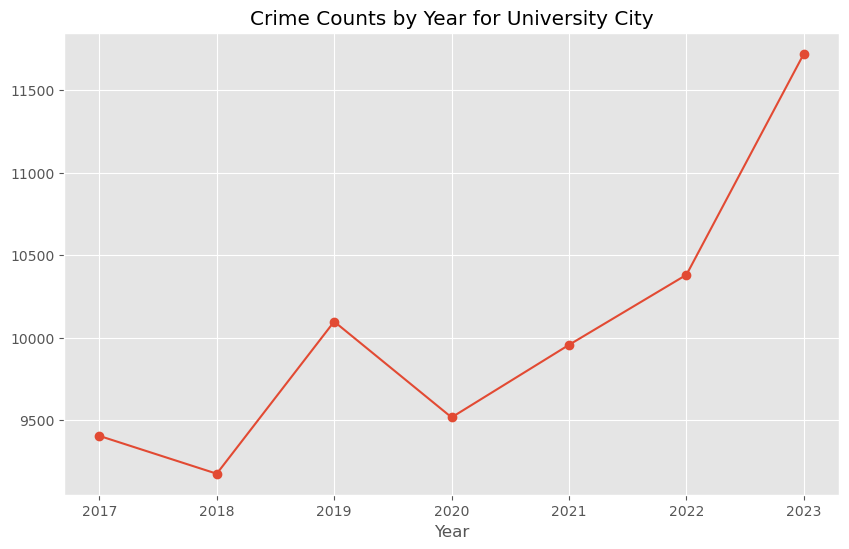

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(University_crime_counts['YEAR'], University_crime_counts['Count'], marker='o')
plt.title('Crime Counts by Year for University City')
plt.xlabel('Year')

A visualization was created with the annual data from University City.  We can see a steady increase since 2017 with a drop off during the pandemic. Since 2020, crime has sharply increased.  It will be interesting to see which locations in University are experiencing more crime.  But before we look at locations, we will compare University City to other neighborhoods.

In [ ]:
SteeleCreek_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='Steele Creek') & (CLT_crime['YEAR'] <= 2023)]
SteeleCreek_crime_counts = SteeleCreek_data .groupby('YEAR').size().reset_index(name='Count')

North_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='North') & (CLT_crime['YEAR'] <= 2023)]
North_crime_counts = North_data.groupby('YEAR').size().reset_index(name='Count')

Westover_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='Westover') & (CLT_crime['YEAR'] <= 2023)]
Westover_crime_counts = Westover_data.groupby('YEAR').size().reset_index(name='Count')

Metro_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='Metro') & (CLT_crime['YEAR'] <= 2023)]
Metro_crime_counts = Metro_data.groupby('YEAR').size().reset_index(name='Count')

Text(0.5, 0, 'Year')

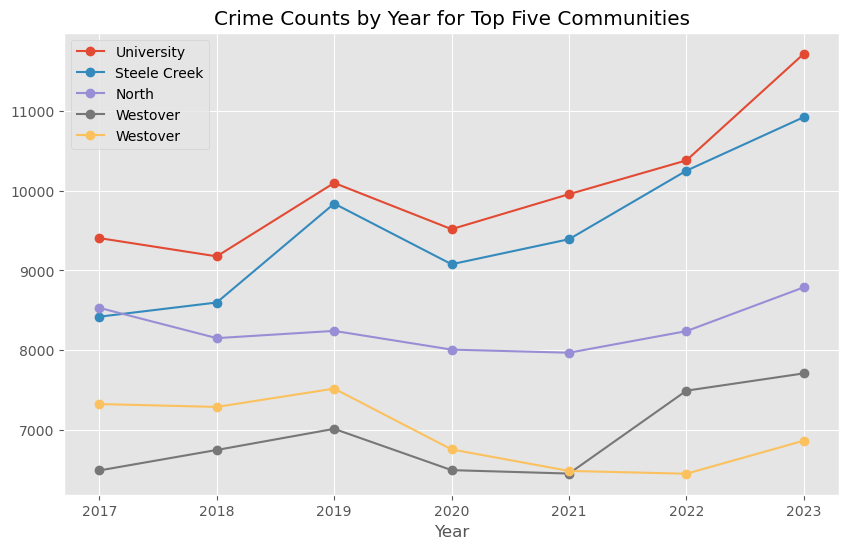

In [ ]:
plt.close()
plt.figure(figsize=(10, 6))
plt.plot(University_crime_counts['YEAR'], University_crime_counts['Count'], marker='o', label= "University")
plt.plot(SteeleCreek_crime_counts['YEAR'], SteeleCreek_crime_counts['Count'], marker='o', label= "Steele Creek")
plt.plot(North_crime_counts['YEAR'], North_crime_counts['Count'], marker='o', label= "North")
plt.plot(Westover_crime_counts['YEAR'], Westover_crime_counts['Count'], marker='o', label= "Westover")
plt.plot(Metro_crime_counts['YEAR'], Metro_crime_counts['Count'], marker='o', label= "Westover")
plt.title('Crime Counts by Year for Top Five Communities')
plt.legend(loc="upper left" )
plt.xlabel('Year')


The chart above displays the top 5 neighborhoods that are experiencing the most incidents since 2017.  We can compare University City area with the other locations.  We can visually see similar changes. There was a drop in 2020 likely to the pandemic and guidelines that strongly suggested that citizens stay at home. Beginning in 2021, we see a slow increase likely due to ease of restrictions.  

In [ ]:
Providence_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='Providence') & (CLT_crime['YEAR'] <= 2023)]
Providence_crime_counts = Providence_data .groupby('YEAR').size().reset_index(name='Count')

Independence = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='Independence') & (CLT_crime['YEAR'] <= 2023)]
Independence_crime_counts = North_data.groupby('YEAR').size().reset_index(name='Count')

South_data = CLT_crime[(CLT_crime['CMPD_PATROL_DIVISION']=='South') & (CLT_crime['YEAR'] <= 2023)]
South_crime_counts = South_data.groupby('YEAR').size().reset_index(name='Count')

Text(0.5, 0, 'Year')

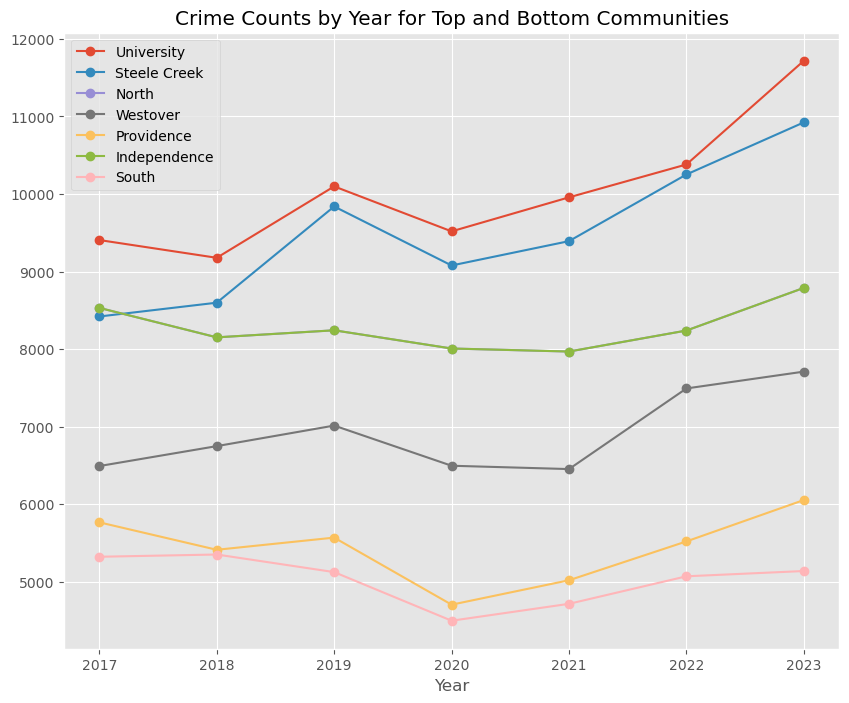

In [ ]:
plt.close()
plt.figure(figsize=(10, 8))
plt.plot(University_crime_counts['YEAR'], University_crime_counts['Count'], marker='o', label= "University")
plt.plot(SteeleCreek_crime_counts['YEAR'], SteeleCreek_crime_counts['Count'], marker='o', label= "Steele Creek")
plt.plot(North_crime_counts['YEAR'], North_crime_counts['Count'], marker='o', label= "North")
plt.plot(Westover_crime_counts['YEAR'], Westover_crime_counts['Count'], marker='o', label= "Westover")

plt.plot(Providence_crime_counts['YEAR'], Providence_crime_counts['Count'], marker='o', label= "Providence")
plt.plot(Independence_crime_counts['YEAR'], Independence_crime_counts['Count'], marker='o', label= "Independence")
plt.plot(South_crime_counts['YEAR'], South_crime_counts['Count'], marker='o', label= "South")

plt.title('Crime Counts by Year for Top and Bottom Communities')
plt.legend(loc="upper left" )
plt.xlabel('Year')

The chart above allows us to compare the top 5 and bottom 5 neighborhoods.  We still see the drop in 2020 with a steady increase beginning in 2021.

All communites had a significant increase from 2022 to 2023 with the exception of the South division.  It had an increase, but it was not as sharp. In general, crime has been increasing across the entire city.

##### **Types of Crimes for All Neighborhoods**

We have determined all neighborhoods have been experiencing an increase in the number of incidents with the University City area expereincing the largest increase.

Now, let's look at what type of crime is committed most across all neighborhoods .  From the table belwo it is "Theft from Motor Vehicle". Followed closely by "All other offense" and "Other Unlisted Non Criminal" offenses.

In [ ]:
Top_types=CLT_crime['HIGHEST_NIBRS_DESCRIPTION'].value_counts()
Top_types_clt_crime = CLT_crime[CLT_crime['HIGHEST_NIBRS_DESCRIPTION'].isin(Top_types[Top_types > 25000].index)]
#Top_types_clt_crime['HIGHEST_NIBRS_DESCRIPTION'].value_counts()

<Axes: >

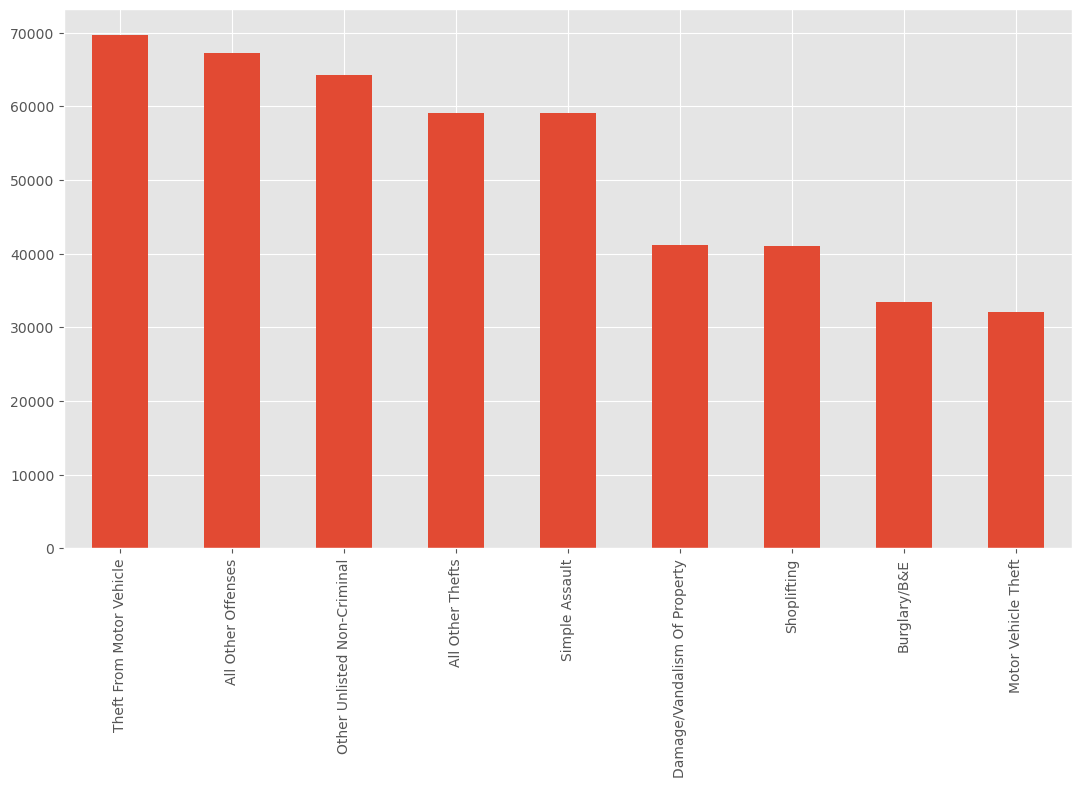

In [ ]:
Top_types_clt_crime['HIGHEST_NIBRS_DESCRIPTION'].value_counts().plot(kind='bar')

We can also see from the table below. Most crimes are committed at a person's home either at private resident or apartment/duplex.

In [ ]:
Top_place = CLT_crime['PLACE_DETAIL_DESCRIPTION'].value_counts()
Top_place_clt_crime = CLT_crime[CLT_crime['PLACE_DETAIL_DESCRIPTION'].isin(Top_place[Top_place > 15000].index)]
#Top_place_clt_crime['PLACE_DETAIL_DESCRIPTION'].value_counts()

<Axes: >

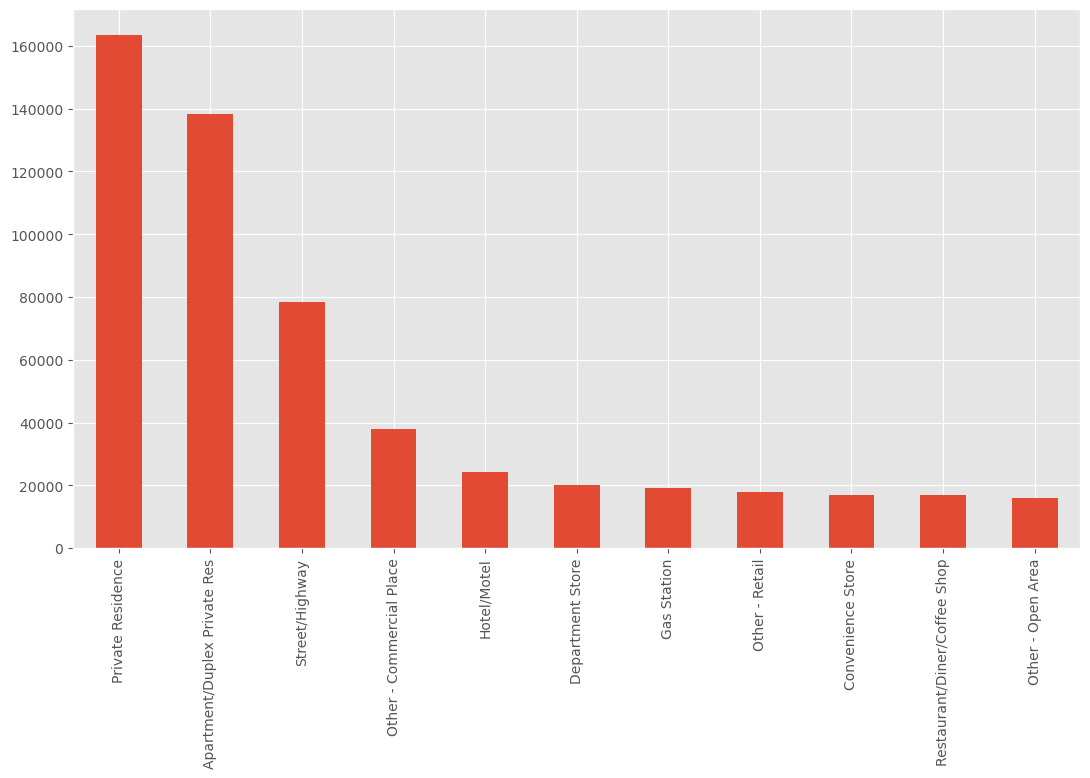

In [ ]:
Top_place_clt_crime['PLACE_DETAIL_DESCRIPTION'].value_counts().plot(kind='bar')

##### **Target Neighborhood University City**

From the data we have observed University City from 2017 to the present has had the highest number of criminal incidents.

Let's just look at 2023 in University City.  We want to view the top ten criminal types and to see which month(s) had the highest number of incidents.

In [ ]:
University_data.head()

,YEAR,DIVISION_ID,CMPD_PATROL_DIVISION,NPA,DATE_REPORTED,DATE_INCIDENT_BEGAN,DATE_INCIDENT_END,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,Month
id,,,,,,,,,,,,,,,
3,2019,14,University City,219,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,2019/08/22 00:00:00+00,Commercial Place,Hotel/Motel,Cleared by Arrest,Cleared by Arrest,2019/08/22 00:00:00+00,280,Stolen Property Offenses,August
6,2020,14,University City,331,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,2020/02/04 00:00:00+00,Public/Non-Residential,School - Primary or Secondary,Open,Open,2024-09-15,23F,Theft From Motor Vehicle,February
17,2019,14,University City,195,2019/12/27 00:00:00+00,2019/12/27 00:00:00+00,2024-09-15,Residential,Apartment/Duplex Private Res,Exceptionally Cleared,Located (Missing Persons and Runaways only),2019/12/30 00:00:00+00,800,Missing Person,December
30,2020,14,University City,219,2020/05/31 00:00:00+00,2020/05/24 00:00:00+00,2020/05/25 00:00:00+00,Commercial Place,Hotel/Motel,Open,Open,2024-09-15,90Z,All Other Offenses,May
37,2023,14,University City,155,2023/05/04 00:00:00+00,2023/05/04 00:00:00+00,2024-09-15,Open Area,Street/Highway,Exceptionally Cleared,Cleared by Other Means,2023/07/25 00:00:00+00,807,Public Accident,May


In [ ]:
# filter
UniversityData2023 = CLT_crime[(CLT_crime['YEAR'] <= 2023) &
                                (CLT_crime['CMPD_PATROL_DIVISION']=='University City') &
                                (CLT_crime['HIGHEST_NIBRS_DESCRIPTION'])]

Top10_UniversityData2023 = UniversityData2023['HIGHEST_NIBRS_DESCRIPTION'].value_counts().head(10)

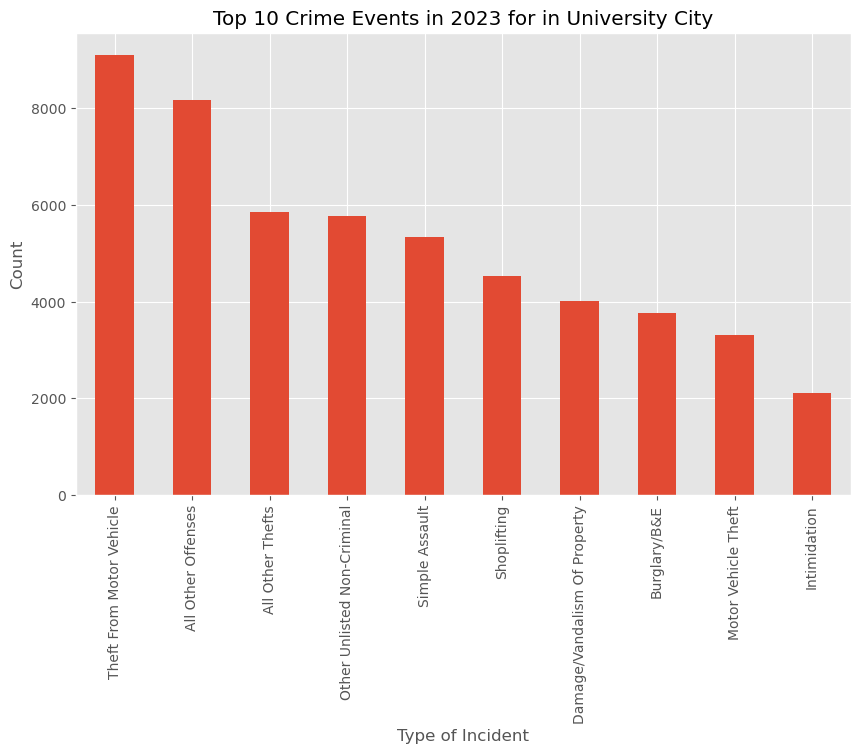

In [ ]:
plt.figure(figsize=(10, 6))
Top10_UniversityData2023.plot(kind='bar')
plt.title('Top 10 Crime Events in 2023 for in University City')
plt.xlabel('Type of Incident')
plt.ylabel('Count')
plt.show()

The bar chart still shows that Theft from Motor Vechile is the top incident that occured last year.  Given the amount od news coverage on the TikTok challenge of stealing Kias, I am surprised that auto theft was not higher. It is number with less than 4000 incidents.

In [ ]:
UniversityData2023 = CLT_crime[(CLT_crime['YEAR'] <= 2023) &
                                (CLT_crime['CMPD_PATROL_DIVISION']=='University City') &
                                (CLT_crime['PLACE_DETAIL_DESCRIPTION'])]

Top10_UniversityData2023L = UniversityData2023['PLACE_DETAIL_DESCRIPTION'].value_counts().head(10)

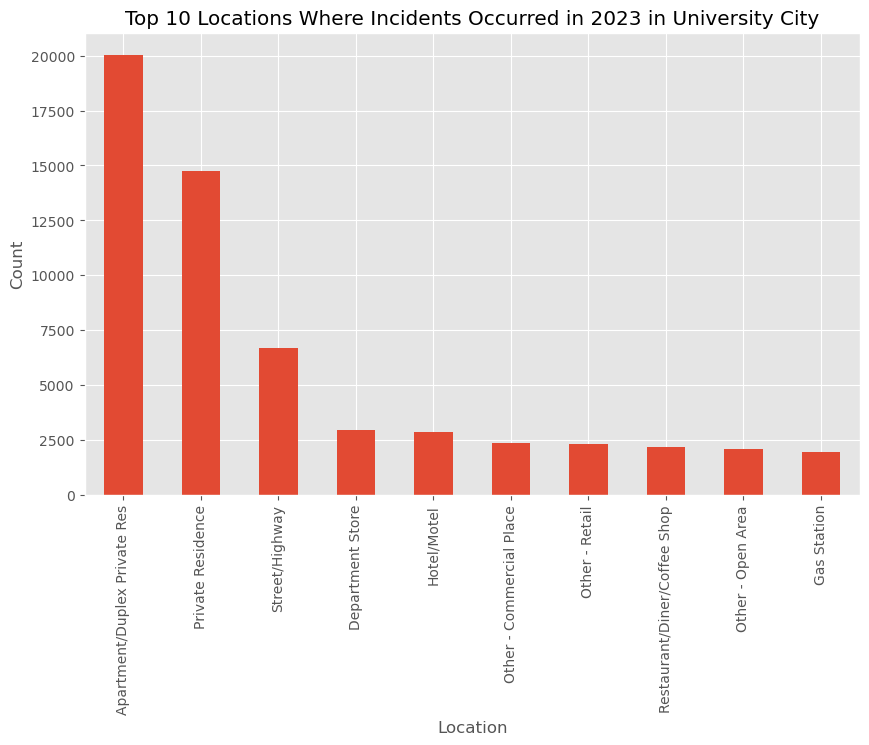

In [ ]:
plt.figure(figsize=(10, 6))
Top10_UniversityData2023L.plot(kind='bar')
plt.title('Top 10 Locations Where Incidents Occurred in 2023 in University City')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

Above we can see in the University City area, apartment/duplex have significantly more criminal incidents as campared to a private resident.  This could be due to the number of students attending UNC Charlotte and live in off-campus housing.

In [ ]:
UniversityData2023 = CLT_crime[(CLT_crime['YEAR'] <= 2023) &
                                (CLT_crime['CMPD_PATROL_DIVISION']=='University City') &
                                (CLT_crime['HIGHEST_NIBRS_DESCRIPTION'])]

Text(0.5, 1.0, 'Number of Incidents per Month')

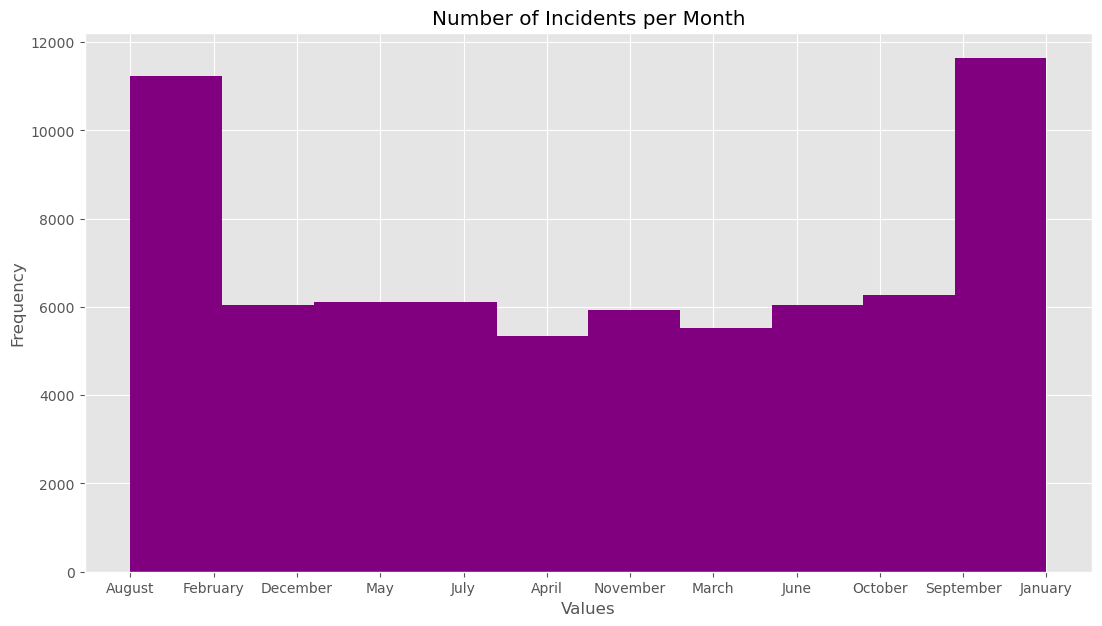

In [ ]:
plt.hist(UniversityData2023['Month'], color= 'purple')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Number of Incidents per Month')

In 2023, most of the criminal incidents occurred in the months of August and September.  The rise in crime during the summer is consistent with crime across the nation.  There are various that attribute the "rise in temperatures causes a rise in tempers, kids and college age students are out of school, and everyone wants to be outside.

##  Conclusion / Impact

For our analysis we were able to see that the University City area in Mecklenburg has had the highest overall incidents of crime since 2017.  Theft from motor vehicle was the number one type of crime committed in the county including within University City. Although, in other neighborhoods crime was nearly equally likely to be committed in either a private resident or apartment/duplex, in University City a crime was significantly more likely to happen it you lived in an apartment/duplex.

When technology is used in crime preventation, it can be both positive and negative.  The positive impact is that law enforcement could meet with city officals to discuss ways to reduce crime by increasing lighting in areas, increase police patrols in certain or talking with community groups who are able to go into the neighborhoods (along with law enforcement) to make a positive impact.

On the negative side,  law enforcement could decide to increase patrols in certain area to the point that everyone in the community feels as if they were under surviallence. It's possible that crime could be reduce, because the crimes are leaving one area and moving to another area. Also, we need to understand that AI is making predictions on past events. People have the ability to change but AI is not considering that fact.

The data missing is more details about types of crime committed.  For example, "All other offense" is one of the largest categories but we don't know which offense are in that category.  

The data is also missing info about the suspect.  I am curious about the age of the suspect, level of eduation, number of past offenses and whether they lived in the divison the crime was committed in. I wonder if crime is just an crime of opportunity and you know you can get away or if it's planned out from the beginning.


#References:

1.   https://www.charlottenc.gov/cmpd/News-Information/Crime-Statistics-Report
2.   https://data.charlottenc.gov/datasets/charlotte::cmpd-incidents-1/about
3.   https://ui.charlotte.edu/story/how-find-information-your-neighborhood
4.   https://www.charlottenc.gov/cmpd/ePolicing-Resources/Patrol-Area-Divisions
5.   https://www.wired.com/story/crime-prediction-racist-history/
6.   https://www.pbs.org/newshour/nation/why-shootings-and-violence-increase-in-the-summer-months








